Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 1.4345 - mae: 0.9070 - val_loss: 1.6339 - val_mae: 1.0457
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 1.3269 - mae: 0.8902 - val_loss: 1.6266 - val_mae: 1.0253
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 1.2334 - mae: 0.8438 - val_loss: 1.5925 - val_mae: 1.0521
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 1.1868 - mae: 0.8422 - val_loss: 1.5796 - val_mae: 1.0783
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 1.2739 - mae: 0.8657 - val_loss: 1.5987 - val_mae: 1.0356
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 1.1520 - mae: 0.8326 - val_loss: 1.5702 - val_mae: 1.0115
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 1.1140 - mae: 0.8007 - val_loss: 1.5145 - val_mae: 1.0251
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 1.0798 - mae: 0.7

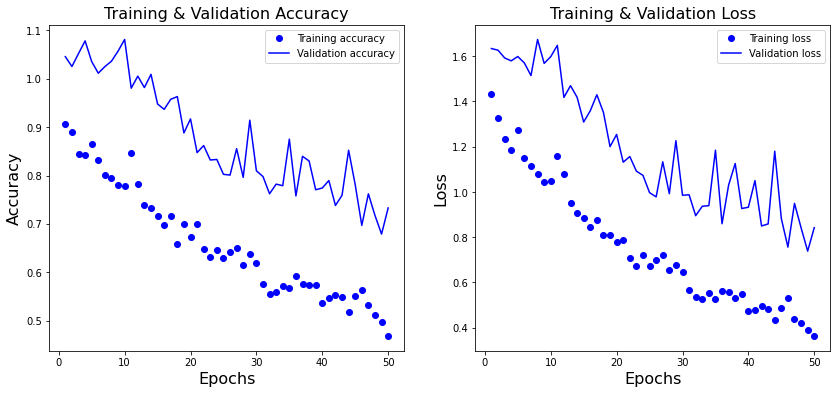

In [39]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, optimizers

db = pd.read_csv('Dizyme.csv')

di2 = {'TMB':1.0, 'H2O2':2.0, 'ABTS': 3.0, 'OPD': 4.0, 'DAB':5.0, 'BA':6.0}
db['Subtype'].replace(di2, inplace=True)

x = db.loc[:,'Syngony':'Ccat'].values
y = db.loc[:,'Km'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)


from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train = np.log10(y_train)
y_test = np.log10(y_test)


network = models.Sequential()
network.add(layers.Dense(24, activation='relu', input_shape=(13,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer=optimizers.Adam(learning_rate=0.01),
                loss='mse',
                metrics=['mae'])

history = network.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=15)
                    
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

r2_score: 0.48816821624849194
Mean Absolute Error: 0.7330012901620894
Mean Squared Error: 0.8421716899472881
Root Mean Squared Error: 0.9176991282262875


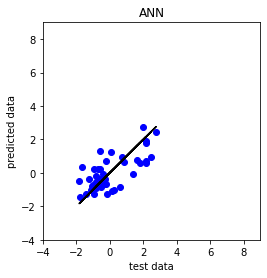

In [40]:
y_pred = network.predict(x_test)


from sklearn import metrics
print('r2_score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title('ANN')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(-4, 9)
plt.ylim(-4, 9)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
